# City of Austin 
## Summary:
### Average Sale price in the city of Austin is at a all time high at 450 K.Market is busy.
### Austin had no room count information, zero bedrooms topped the sales list, tey prefer 3 baths. There is no half
### bath concept in Austin.
### Size of parking lot did not have a huge impact on  house sales.
    

In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
austin_data_to_load = "data/lm10_AllEvents_City_Austin_Property.csv"


# Read the Data
austin_data_df = pd.read_csv(austin_data_to_load)
austin_data_df.head()


,StatusCode,StatusMsg,IdentifierObPropId,IdentifierFips,IdentifierApn,IdentifierApnOrig,IdentifierAttomId,LotDepth,LotFrontage,LotLotsize1,...,AssessmentCalculationsCalclandvalue,AssessmentCalculationsCalcttlind,AssessmentCalculationsCalcttlvalue,AssessmentCalculationsCalcvaluepersizeunit,AssessmentMarketMktimprvalue,AssessmentMarketMktlandvalue,AssessmentMarketMktttlvalue,AssessmentTaxTaxamt,AssessmentTaxTaxpersizeunit,AssessmentTaxTaxyear
0,0,SuccessWithResult,4.460000e+12,48453,301888,301888,44641575,0,0,10.240,...,61440,MARKET VALUE,85732,76.55,24292,61440,85732,1879.0,1.68,2017
1,0,SuccessWithResult,4.460000e+12,48453,552752,552752,44649873,0,0,10.220,...,30660,MARKET VALUE,223010,96.88,192350,30660,223010,4650.0,2.02,2017
2,0,SuccessWithResult,3.570000e+12,48453,301889,301889,35684914,0,0,4.657,...,37256,MARKET VALUE,49982,36.54,12726,37256,49982,2061.0,1.51,2017
3,211,Success with results. Address positioning is a...,1.660000e+13,48453,301887,301887,166353924,0,0,20.430,...,97247,MARKET VALUE,103874,0.00,6627,97247,103874,2217.0,0.00,2017
4,0,SuccessWithResult,1.660000e+13,48453,301334,301334,166032426,0,0,15.550,...,111960,MARKET VALUE,156522,149.35,44562,111960,156522,3303.0,3.15,2017


In [5]:
austin_data_cleaned_df = austin_data_df[['SummaryYearbuilt','AddressOneLine','LotLotsize2','LocationLongitude',\
'LocationLatitude','UtilitiesHeatingtype','BuildingSizeGrosssize',\
'BuildingSizeLivingsize',\
'BuildingRoomsBathstotal','BuildingRoomsBeds','BuildingRoomsRoomsTotal','BuildingParkingPrkgSize',\
'SaleAmountSaleamt','AssessmentTaxTaxamt','SummaryProptype']]

austin_data_cleaned_df.fillna(0, inplace=True)
austin_data_cleaned_df.set_index('SummaryYearbuilt')

austin_data_cleaned_df = austin_data_cleaned_df[austin_data_cleaned_df['SummaryYearbuilt'] > 0]
austin_data_cleaned_df = austin_data_cleaned_df[austin_data_cleaned_df['SaleAmountSaleamt'] > 0]
austin_data_cleaned_df = austin_data_cleaned_df[austin_data_cleaned_df['AssessmentTaxTaxamt'] > 0]
austin_data_cleaned_df = austin_data_cleaned_df[austin_data_cleaned_df['SummaryProptype'] != 'VACANT LAND (NEC)']

austin_data_renamed_df  = austin_data_cleaned_df.rename(columns = {"SummaryYearbuilt": "Year Built", "SaleAmountSaleamt" : "Sale Amount"})




In [6]:
x_axis = np.sort(austin_data_renamed_df['Year Built'].unique())
x_axis

array([1930, 1940, 1950, 1955, 1956, 1958, 1962, 1965, 1966, 1967, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

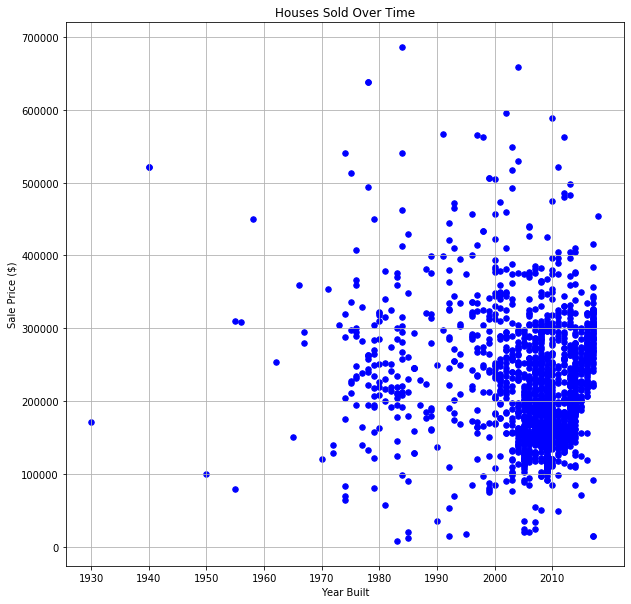

In [7]:
data = austin_data_renamed_df[['Year Built','Sale Amount']]

plt.figure(figsize=(10,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()

plt.show()

In [8]:
#taking the outliers out, in this case it is only the year
data = data[(data['Year Built'] > 1940)]
data.head()

,Year Built,Sale Amount
22,1983,8000
29,1985,20645
84,2000,84900
89,1999,87912
104,1998,97660


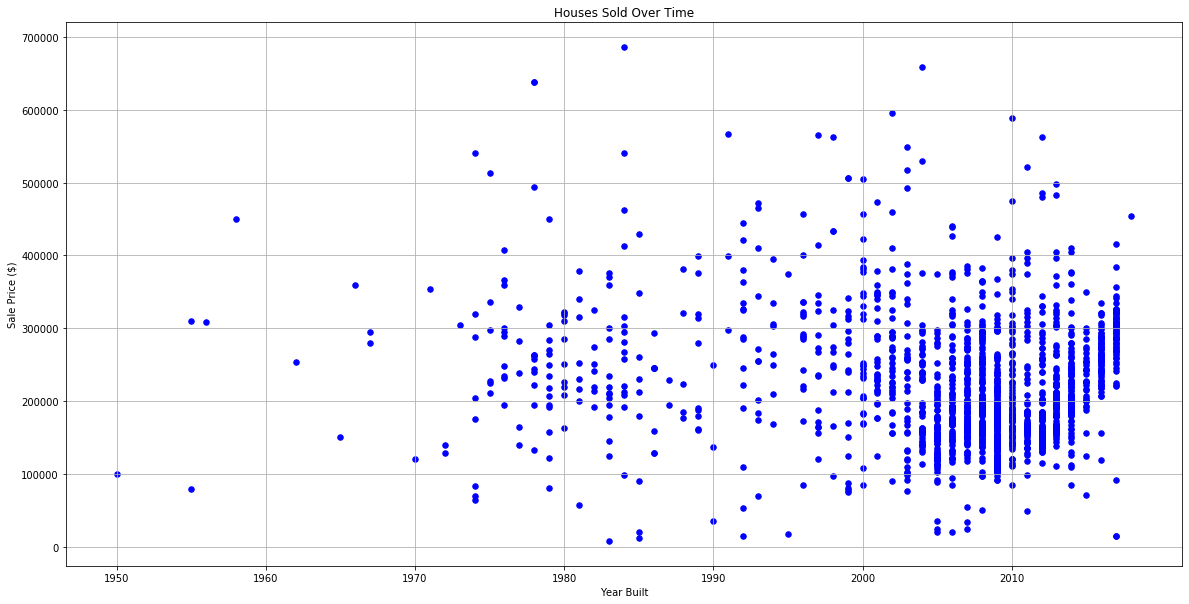

In [9]:
plt.figure(figsize=(20,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 10))

# Create a title, x label, and y label for our chart
plt.title("Houses Sold Over Time")
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")

# set grid lines
plt.grid()


In [11]:
# get the mean value and plot the scatter by year
mean_austin_data = data.groupby(["Year Built"]).mean()

# Convert to DataFrame
mean_austin_df = mean_austin_data.reset_index()

# Preview DataFrame
mean_austin_df.head()

,Year Built,Sale Amount
0,1950,100000.0
1,1955,194443.0
2,1956,309375.0
3,1958,450000.0
4,1962,254374.0


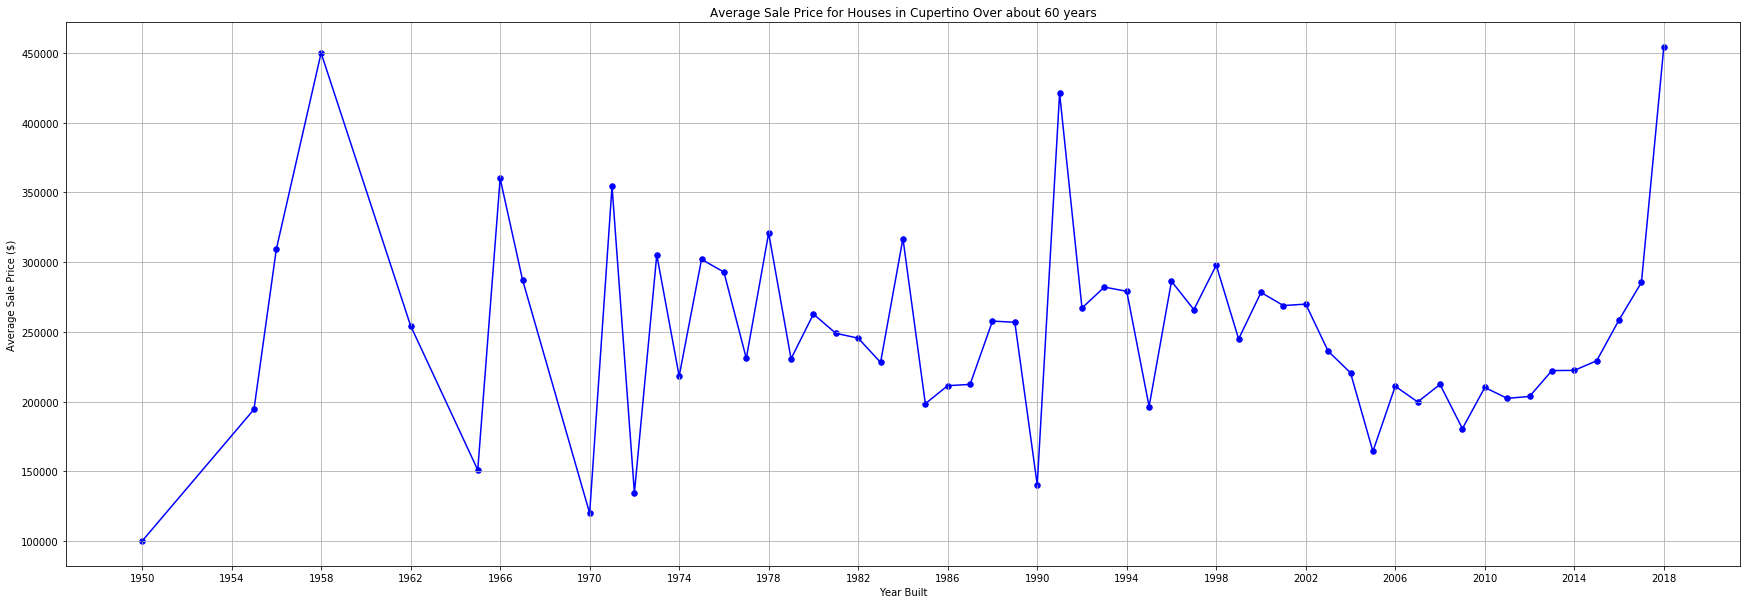

In [13]:
data = mean_austin_df

plt.figure(figsize=(30,10))
plt.scatter(data['Year Built'], data['Sale Amount'],marker="o",c="b", s = 30)
plt.errorbar(data['Year Built'], data['Sale Amount'], color="b")

plt.xticks(np.arange(min(data['Year Built']),max(data['Year Built']) + 1, 4))

# Create a title, x label, and y label for our chart
plt.title("Average Sale Price for Houses in Cupertino Over about 60 years")
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price ($)")

# set grid lines
plt.grid()

# Save the Figure
plt.savefig("Images/Austin_AverageSalePrice")

plt.show()

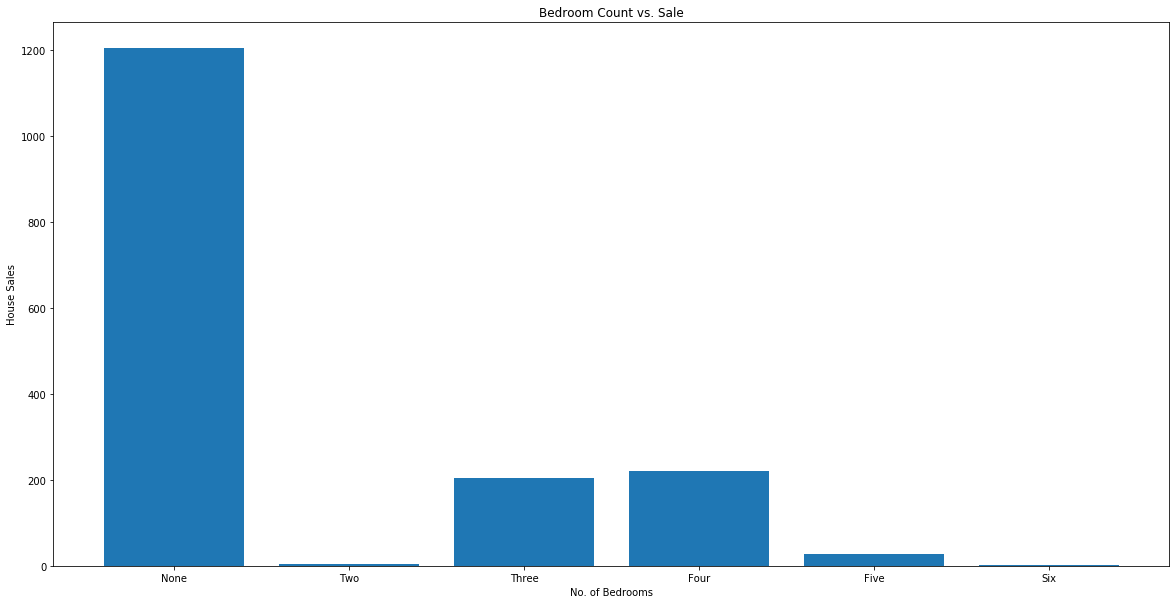

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(20,10))

austin_data_renamed_df['Count Value'] = 1

x_axis = austin_data_renamed_df['BuildingRoomsBeds'].unique()
x_axis
bars_in_bedrooms = ["None","Two", "Three", "Four", "Five","Six"]

data = austin_data_renamed_df.groupby(['BuildingRoomsBeds'])['Count Value'].count().reset_index()

plt.bar(bars_in_bedrooms, data['Count Value'], align="center")

plt.title("Bedroom Count vs. Sale")
plt.xlabel("No. of Bedrooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()


plt.savefig("Images/Austin_BedroomCountVsSale")


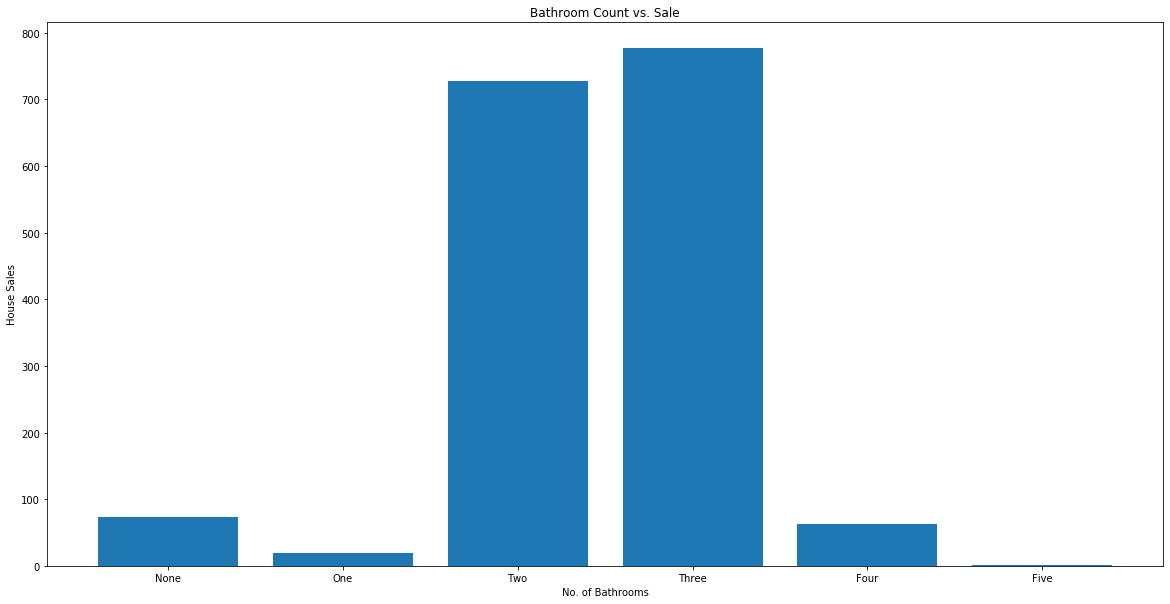

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(20,10))

austin_data_renamed_df['Count Value'] = 1

x_axis = austin_data_renamed_df['BuildingRoomsBathstotal'].unique()
x_axis = [float(x) for x in x_axis.tolist()]
np.sort(x_axis)

bars_in_bathrooms = ["None","One", "Two", "Three", "Four", "Five"]

data = austin_data_renamed_df.groupby(['BuildingRoomsBathstotal'])['Count Value'].count().reset_index()

# data
plt.bar(bars_in_bathrooms, data['Count Value'], align="center")

plt.title("Bathroom Count vs. Sale")
plt.xlabel("No. of Bathrooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()

plt.savefig("Images/Austin_BathroomCountVsSale")


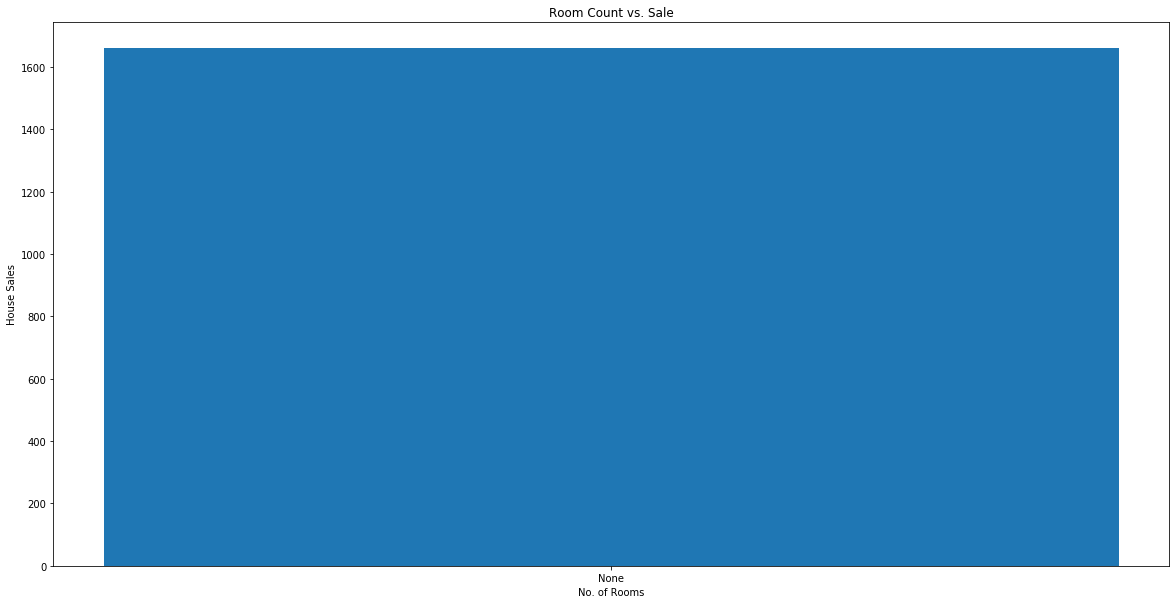

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(20,10))

austin_data_renamed_df['Count Value'] = 1

x_axis = austin_data_renamed_df['BuildingRoomsRoomsTotal'].unique()
np.sort(x_axis)

bars_in_rooms = ["None"]

data = austin_data_renamed_df.groupby(['BuildingRoomsRoomsTotal'])['Count Value'].count().reset_index()
# # data
plt.bar(bars_in_rooms, data['Count Value'], align="center")

plt.title("Room Count vs. Sale")
plt.xlabel("No. of Rooms")
plt.ylabel("House Sales")

plt.show()
     
plt.tight_layout()

plt.savefig("Images/Austin_RoomCountVsSale")

In [26]:
austin_data_renamed_df['Count Value'] = 1

data_groupby_utilities = austin_data_renamed_df.groupby(['BuildingRoomsBeds', 'BuildingRoomsBathstotal'])

data_by_utilities_df = data_groupby_utilities['Count Value'].count().reset_index()


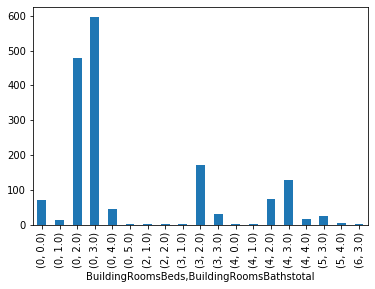

In [27]:
data_groupby_utilities['Count Value'].count().plot(kind='bar')